In [1]:
from numpy import*
from vpython import*
from matplotlib.pyplot import*
from random import*
import matplotlib.animation as animation

<IPython.core.display.Javascript object>

## Problema 1

In [2]:
#a)
print(randrange(1,7), randrange(1,7))

3 5


In [3]:
#b)
cont = 0
for i in range(1000000):
    x = randrange(1,7)
    y = randrange(1,7)
    if(x==6 and x==y): 
        cont += 1
frac = cont/1e6
frac, 1/36

(0.028097, 0.027777777777777776)

## Problema 2

In [4]:
NBi, NTl, NPb, NBi_09 = 10000, 0, 0, 0
meiav_B = 46*60 #meia-vida do Bi
meiav_T = 2.2*60 #meia-vida do TI
meiav_P = 3.3*60 #meia-vida do Pb
tmax = 20000
t = arange(0, tmax, 1)
def p(tau):
    return 1 - 2**(-1/tau)

In [5]:
Bi, Tl, Pb, Bi_09 = [], [], [], []
pBi = p(meiav_B)
pTl = p(meiav_T)
pPb = p(meiav_P)
for i in t:
    Bi.append(NBi)
    Tl.append(NTl)
    Pb.append(NPb)
    Bi_09.append(NBi_09)
    
    tempTl = 0
    tempPb = 0
    
    #c) Decaimento do Bi 213
    for q in range(NBi):
        if random()<(pBi*0.0209):
            tempTl += 1
        elif random()<(pBi*0.9791):
            tempPb += 1
    NBi -= (tempTl + tempPb)
    NTl += tempTl
    NPb += tempPb
    
    #b) Decaimento do Tl
    tempTl = 0
    for q in range(NTl):
        if random()<pTl:
            tempTl += 1
    NTl -= tempTl
    NPb += tempTl
    
    #a) Decaimento do Pb
    tempPb = 0
    for j in range(NPb):
        if random()<pPb:
            tempPb += 1
    NPb -= tempPb
    NBi_09 += tempPb

0 84 5 9911


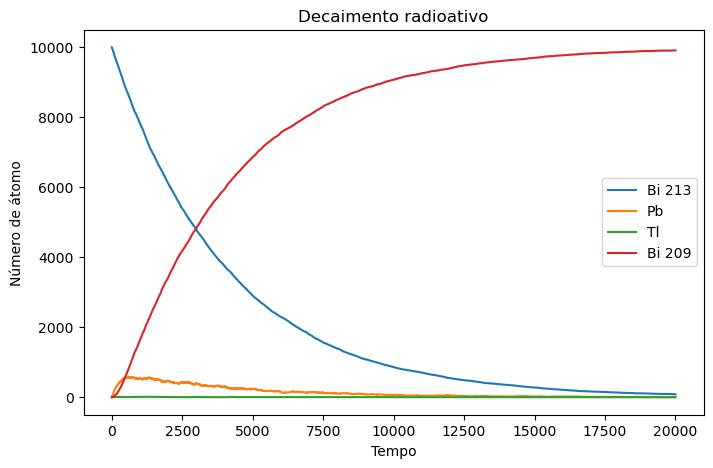

In [6]:
figure(figsize=(8,5))
plot(t, Bi, label="Bi 213")
plot(t, Pb, label="Pb")
plot(t, Tl, label="Tl")
plot(t, Bi_09, label="Bi 209")
title("Decaimento radioativo")
xlabel("Tempo")
ylabel("Número de átomo")
legend()
print(NTl, NBi, NPb, NBi_09)

## Problema 3

### Com vpython

In [ ]:
def grid(xmax, dx):
    for x in range(-xmax, xmax+dx, dx):
        curve(pos = [vector(x,xmax,0), vector(x,-xmax,0)])
    for y in range(-xmax, xmax+dx, dx):
        curve(pos = [vector(xmax,y,0), vector(-xmax,y,0)])
    return

In [ ]:
xi, yi = 0, 0 #posição inicial da partícula
pmin = -50
pmax = 50
tmax = 1000
#com vpython (eu finalmente consegui)
scene2 = canvas(title = 'Movimento Browniano', width = 500, height = 500,background = color.white)
par = sphere(radius=1, color = color.green)
grid(50,1)
for i in range(tmax):
    rate(20)
    par.pos = vector(xi, yi, 0)
    
    if random()<0.5:
        xi += 1
        if xi>pmax:
            xi -= 1
    else:
        xi -= 1
        if xi<pmin:
            xi+=1
                
    if random()<0.5:
        yi+=1
        if yi>pmax:
            yi-=1
    else:
        yi-=1
        if yi<pmin:
            yi+=1

### com matplotlib

In [ ]:
# com matplotlib
xi, yi = 50, 50 #posição inicial da partícula
pmin = 0
pmax = 100
tmax = 1000
t = arange(0, tmax, 1)
x, y = [], []

for i in range(tmax):
    x.append(xi)
    y.append(yi)
    
    if random()<0.5:
        xi += 1
        if xi>pmax:
            xi -= 1
    else:
        xi -= 1
        if xi<pmin:
            xi+=1
                
    if random()<0.5:
        yi+=1
        if yi>pmax:
            yi-=1
    else:
        yi-=1
        if yi<pmin:
            yi+=1
            
fig, ax = subplots()
axis('off')
r, = ax.plot([], [],'bo')

def init():
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    
def walk(t):
    global x,y
    r.set_data(x[t],y[t])       
    return r,

ani = animation.FuncAnimation(fig, walk, arange(1, tmax), interval=1, init_func=init)
ani.save('Simulação_do_movimento_Browniano.gif', fps = 60)

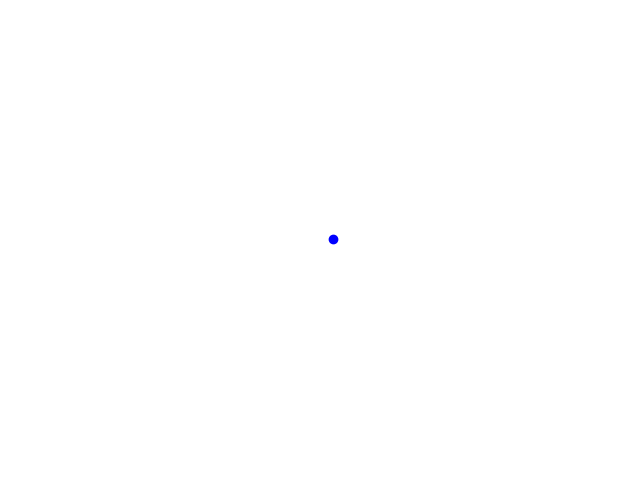

### Extra

In [ ]:
# Extra simulação do movimento Browniano com várias partículas 
scene2 = canvas(title = 'Movimento Browniano das partículas de um Gás', width = 500, height = 500,background = color.white)
grid(50,1)
x, y = [], [] #são listas da posição inical das partículas
N = 1000
n = 100

#essa função é para dar uma posição inical as partículas
for i in range(n):
    x.append(randrange(-50,51))
    y.append(randrange(-50,51))
    
#definindo n partículas
par = []
for i in range(n):
    par.append(sphere(pos = vector(x[i], y[i], 0),radius=1, color = color.green))


# In[7]:


pmax, pmin = 50, -50

for J in range(N):
    rate(50)
    for i in range(n):
        # encontrando a nova posição em x 
        if random()<0.5:
            x[i] += 1
            if x[i] > pmax:
                x[i] -= 1
        else:
            x[i] -= 1
            if x[i] < pmin:
                x[i] += 1

        # encontrando a nova posição em y
        if random()<0.5:
            y[i] += 1
            if y[i] > pmax:
                y[i] -= 1
        else:
            y[i] -= 1
            if y[i] < pmin:
                y[i] += 1
                
        par[i].pos = vector(x[i] ,y[i] , 0)

## Problema 4

In [7]:
#a)
N = 10000
mi = 1
def fx(t):
    return -log(1-t)/mi

x = []
for i in range(N):
    t = random()
    x.append(fx(t))

Text(0, 0.5, 'Quantidade de amostras sorteadas em um seu repectivo intervalo')

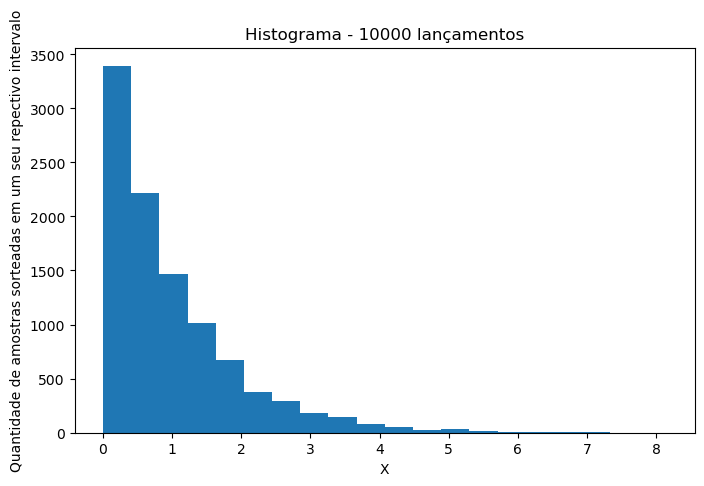

In [8]:
figure(figsize=(8,5))
hist(x, bins = 20)
title("Histograma - 10000 lançamentos")
xlabel("X")
ylabel("Quantidade de amostras sorteadas em um seu repectivo intervalo")

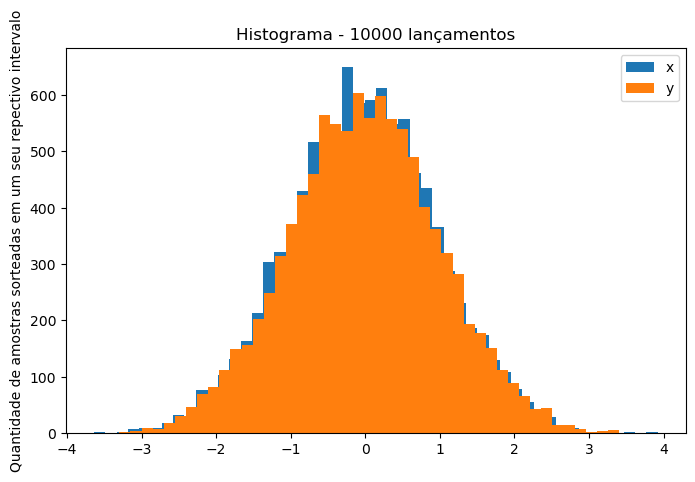

In [9]:
#b)
x, y = [], []
def fr(x):
    return mi*sqrt(-2*log(1-x))

for i in range(N):
    r = fr(random())
    theta = 2*pi*random()
    
    temp1 = r*cos(theta)
    temp2 = r*sin(theta)
    
    x.append(temp1)
    y.append(temp2)

figure(figsize=(8,5))
hist(x, bins = 50, label = "x")
hist(y, bins = 50, label = "y")
title("Histograma - 10000 lançamentos")
ylabel("Quantidade de amostras sorteadas em um seu repectivo intervalo")
legend()

## Problema 5

In [10]:
#a)
#valor teórico 1.4514
Io = 1.4514
def funcao(x):
    y=(sin(1/(x*(2-x))))**2
    return y

N=10000
A=2
k=0

for i in range(N):
    y = random()
    x = 2*random()
    if y < funcao(x):
        k+=1
        
I = (k*2)/N
err = abs(I-Io)/Io
err

0.0020669698222405206

In [11]:
#b)
S=0
for i in range(N):
    x = 2*random()
    S += funcao(x)
    
I=(S*A)/N
err = abs(I-Io)/Io
err

# Ambos os erros são menores 1%, resultado consideravelmente satisfatório, pois quase não há diferença com o valor teórico, 
#e também é possível notar que o método foi ligeiramente mais preciso que o método de Monte Carlo.

0.0016478011042290177